In [1]:
import numpy as np
import sklearn as sk
import pandas as pd

In [2]:
np.__version__, sk.__version__, pd.__version__

('1.18.4', '0.23.1', '1.0.3')

In [3]:
from sklearn.metrics import accuracy_score

In [45]:
from sklearn.model_selection import train_test_split, GridSearchCV

In [25]:
from xgboost import XGBClassifier, plot_importance

In [6]:
dataset = np.loadtxt('pima-indians-diabetes.csv', delimiter=',')

In [7]:
dataset.shape

(768, 9)

In [8]:
 columns=['임신횟수', '포도당농도',"확장기혈압",'피부두께','저항성','체질량지수','당뇨병병력','나이','정답']

In [9]:
dataset_pd = pd.DataFrame(dataset, columns=columns)

In [10]:
dataset_pd.head()

,임신횟수,포도당농도,확장기혈압,피부두께,저항성,체질량지수,당뇨병병력,나이,정답
0,6.0,148.0,72.0,35.0,0.0,33.6,0.627,50.0,1.0
1,1.0,85.0,66.0,29.0,0.0,26.6,0.351,31.0,0.0
2,8.0,183.0,64.0,0.0,0.0,23.3,0.672,32.0,1.0
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21.0,0.0
4,0.0,137.0,40.0,35.0,168.0,43.1,2.288,33.0,1.0


In [30]:
X = dataset_pd.iloc[:, :8]

In [31]:
Y = dataset[:, 8]

In [32]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=7)

In [62]:
model = XGBClassifier()

In [63]:
model.fit(x_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [68]:
fi = model.feature_importances_

In [72]:
fi.shape

(8,)

In [74]:
df_fi = pd.DataFrame(fi.reshape(1,8), columns=columns[:8])

In [75]:
df_fi

,임신횟수,포도당농도,확장기혈압,피부두께,저항성,체질량지수,당뇨병병력,나이
0,0.097317,0.237255,0.10028,0.093533,0.100127,0.164097,0.099448,0.107943


In [64]:
y_pred = model.predict(x_test)

In [65]:
predictions = [round(value) for value in y_pred]

In [66]:
predictions[:5]

[0.0, 1.0, 0.0, 0.0, 1.0]

In [38]:
accuracy = accuracy_score(y_test, predictions)

In [39]:
accuracy

0.7402597402597403

In [40]:
%matplotlib inline

In [41]:
from xgboost import plot_tree

In [42]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = 300, 400

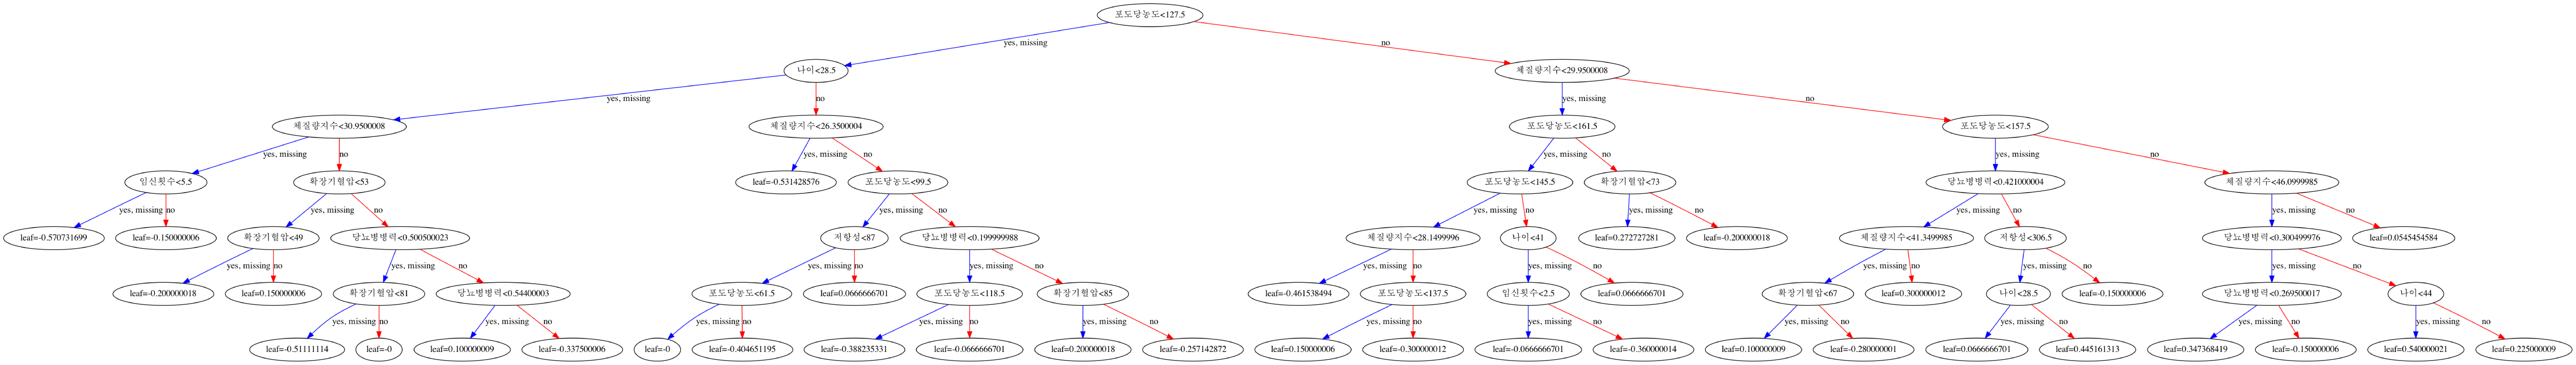

In [43]:
plot_tree(model)
plt.show()

In [44]:
plot_importance(model)
plt.rcParams['figure.figsize'] = 100,200
plt.yticks(fontsize=15)
plt.show()

/Users/dahlmoon/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 54588 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/dahlmoon/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 48512 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/dahlmoon/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 46160 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/dahlmoon/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44760 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/dahlmoon/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51200 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/dahlmoon/anaconda3/lib/python3.7/site-packages/matplotlib/backe

In [46]:
cv_params = { 'max_depth' : np.arange(1,6,1)}

In [47]:
fix_params = { 'booster' : 'gbtree', 'objective' : 'binary:logistic'}

In [48]:
csv = GridSearchCV(XGBClassifier(**fix_params), cv_params, scoring = 'precision', cv=5, n_jobs=5)

In [49]:
csv.fit(x_train, y_train)

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster='gbtree',
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, random_state=None,
                                     reg_alpha=None, reg_lambda=None,
                                     scale_pos_weight=None, subsample=None,
                                     tree_method=N

In [50]:
csv.best_params_

{'max_depth': 1}

In [51]:
y_pred = csv.predict(x_test)

In [52]:
predictions = [round(value) for value in y_pred]

In [54]:
accuracy_score(y_test, predictions)

0.8246753246753247

In [55]:
cv_params_1 = { 'max_depth' : np.arange(1,6,1),
                         'learning_rate' : np.arange(0.05, 0.6, 0.05),
                          'n_estimators' : np.arange(50,300,50)}

In [56]:
csv_1 = GridSearchCV(XGBClassifier(**fix_params), cv_params_1, scoring = 'precision', cv=5, n_jobs=5)

In [57]:
csv_1.fit(x_train, y_train)

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster='gbtree',
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_...
                                     num_parallel_tree=None, random_state=None,
                                     reg_alpha=None, reg_lambda=None,
                                     scale_pos_weight=None, subsample=None,
                                     tree_method=None, va

In [58]:
csv_1.best_params_

{'learning_rate': 0.1, 'max_depth': 1, 'n_estimators': 50}

In [59]:
y_pred_1 = csv_1.predict(x_test)

In [60]:
predictions_1 = [round(value) for value in y_pred_1]

In [61]:
accuracy_score(y_test, predictions_1)

0.7597402597402597